In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline
pd.plotting.register_matplotlib_converters()

In [2]:
df = pd.read_csv('Miles_Traveled.csv')

In [3]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [4]:
df.columns = ['ds','y']


In [5]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [6]:
df['ds'] = pd.to_datetime(df['ds'])

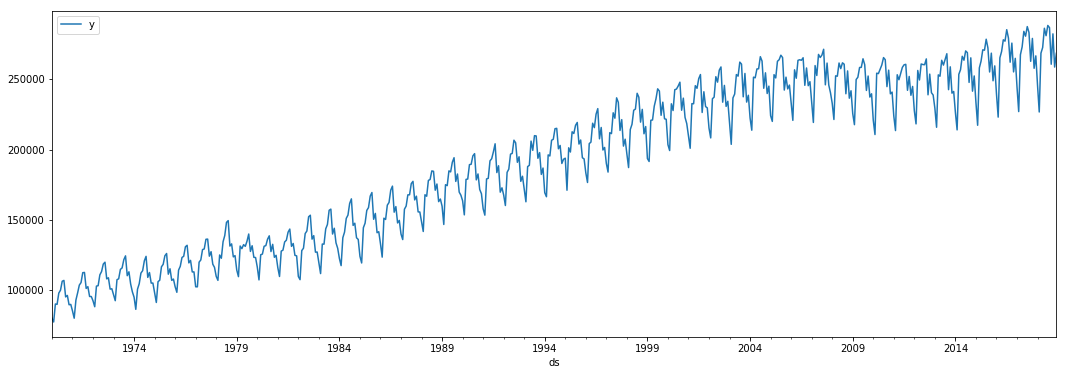

In [7]:
df.plot(x='ds',y='y',figsize=(18,6))

In [8]:
len(df)

588

In [9]:
train = df.iloc[:576]
test = df.iloc[576:]

In [10]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\arjun\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263219.378669,273697.684458,285609.831041,263159.792262,263284.314100,16451.125033,16451.125033,16451.125033,16451.125033,16451.125033,16451.125033,0.0,0.0,0.0,279670.503702
584,2018-09-01,263357.665883,256076.490952,267426.648220,263249.689767,263456.486751,-1666.545411,-1666.545411,-1666.545411,-1666.545411,-1666.545411,-1666.545411,0.0,0.0,0.0,261691.120472
585,2018-10-01,263491.492218,263322.477370,274513.562415,263335.706358,263627.382255,5310.587893,5310.587893,5310.587893,5310.587893,5310.587893,5310.587893,0.0,0.0,0.0,268802.080112
586,2018-11-01,263629.779432,249460.634232,261424.529359,263436.443903,263811.494485,-8203.436940,-8203.436940,-8203.436940,-8203.436940,-8203.436940,-8203.436940,0.0,0.0,0.0,255426.342492
587,2018-12-01,263763.605767,251645.992782,262541.395116,263514.962163,263994.177615,-6916.514689,-6916.514689,-6916.514689,-6916.514689,-6916.514689,-6916.514689,0.0,0.0,0.0,256847.091078


In [12]:
test.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


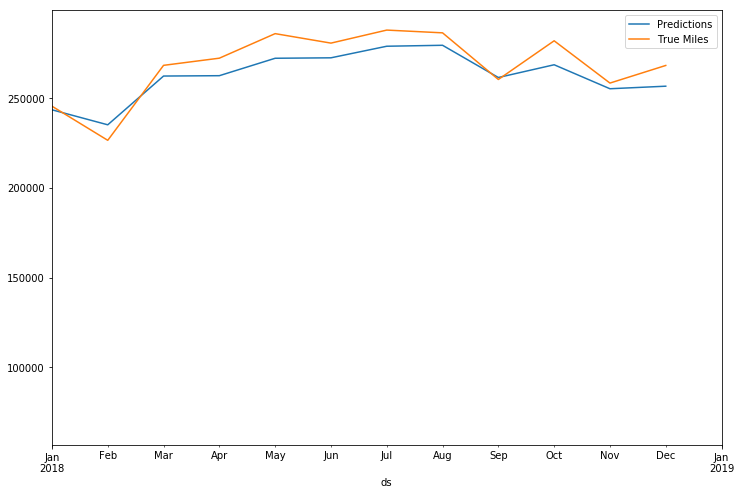

In [13]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [14]:
from statsmodels.tools.eval_measures import rmse

In [15]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [16]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [17]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00
C:\Users\arjun\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\arjun\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\arjun\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\arjun\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecate

In [18]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
103,2017-08-01,273328.467970,267626.023869,279576.436879,283184.0,2016-12-01
104,2017-09-01,255447.843997,249853.383093,261367.406259,262673.0,2016-12-01
105,2017-10-01,262552.901413,256730.816621,268369.686490,278937.0,2016-12-01
106,2017-11-01,249204.331440,243892.931330,255053.214626,257712.0,2016-12-01
107,2017-12-01,250450.721819,244995.794478,255838.741234,266535.0,2016-12-01


In [19]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,coverage
0,52 days,2.437359e+07,4936.961190,4528.637861,0.027750,0.4
1,53 days,2.187095e+07,4676.638408,4262.628303,0.024999,0.4
2,54 days,1.842045e+07,4291.904691,3732.310696,0.020061,0.5
3,55 days,2.351247e+07,4848.965429,4271.125183,0.023241,0.4
4,57 days,2.115130e+07,4599.053997,3989.900860,0.021416,0.5
5,58 days,2.340954e+07,4838.340856,4267.060996,0.022624,0.4
6,59 days,3.816209e+07,6177.547482,5084.706682,0.026311,0.4
7,60 days,3.893160e+07,6239.518878,5149.948941,0.026779,0.4
8,62 days,3.732553e+07,6109.462715,4934.565372,0.025835,0.4
9,80 days,3.233278e+07,5686.192422,4319.783877,0.023741,0.5


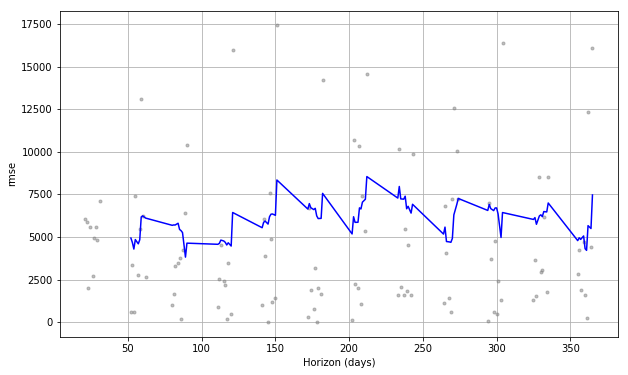

In [20]:
plot_cross_validation_metric(df_cv, metric='rmse');

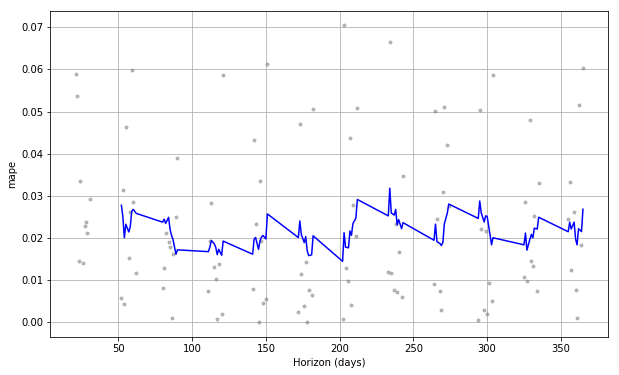

In [21]:
plot_cross_validation_metric(df_cv, metric='mape');

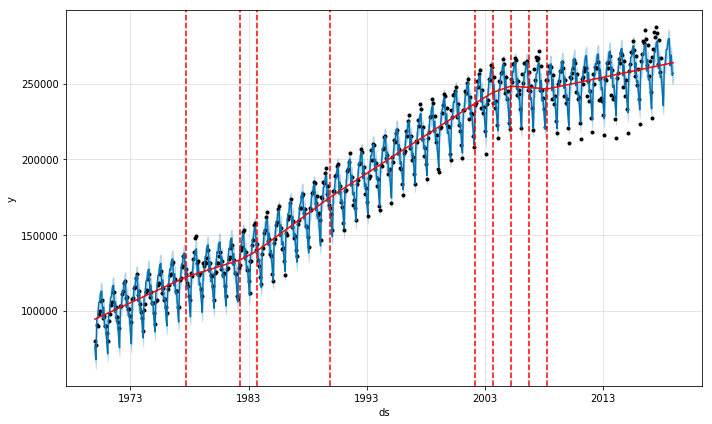

In [22]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)